In [1]:
from pathlib import Path
import cv2
import numpy as np
from matplotlib import pyplot as plt
from xtcocotools.coco import COCO

In [2]:
DATASET_DIR = Path("mp100")
anno = COCO(DATASET_DIR / "annotations_old/mp100_split5_train.json")

loading annotations into memory...
Done (t=0.41s)
creating index...
index created!


In [3]:
def visualize_sample(img_id, point_radius=3, line_width=2):
    """    Visualizes a sample image with its annotations.
    Args:
        img_id (int): The ID of the image to visualize.
        point_radius (int): Radius of the keypoint circles.
        line_width (int): Width of the bounding box lines.
    """
    img = cv2.imread(str(DATASET_DIR / "images" / anno.loadImgs(img_id)[0]['file_name']))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    
    anns = anno.loadAnns(anno.getAnnIds(imgIds=img_id))

    print(anno.loadImgs(img_id)[0]['file_name'])

    for obj in anns:
        bbox = obj['bbox']
        x, y, w, h = map(int, bbox)
        cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), line_width)
        
        keypoints = np.array(obj['keypoints']).reshape(-1, 3)
        for x, y, v in keypoints:
            if v > 0:  # Only draw visible keypoints
                cv2.circle(img, (int(x), int(y)), point_radius, (0, 255, 0), -1)

    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

goldenretriever_face/goldenretriever_43.jpg


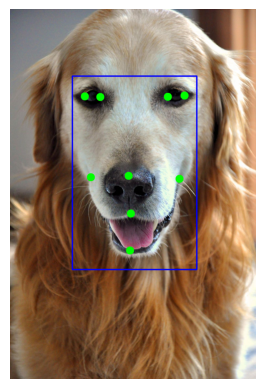

californiansealion_face/californiansealion_81.jpg


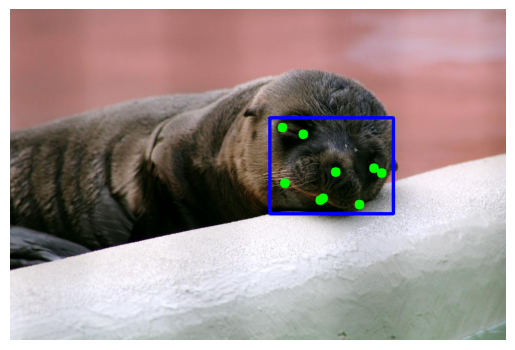

rabbit_body/000000047649.jpg


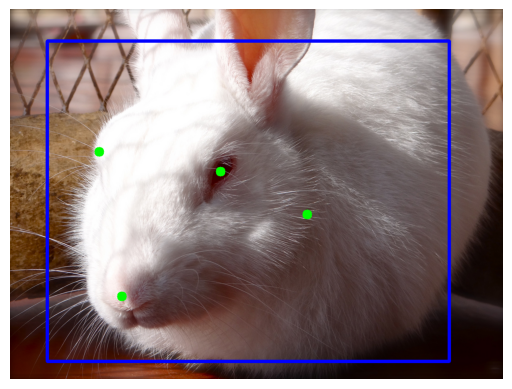

human_hand/Train/source/8470.jpg


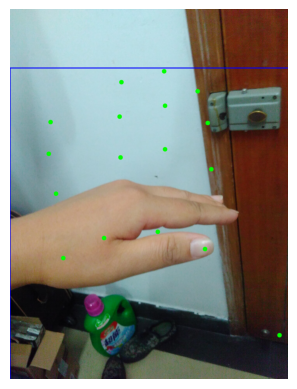

human_hand/Train/source/4250.jpg


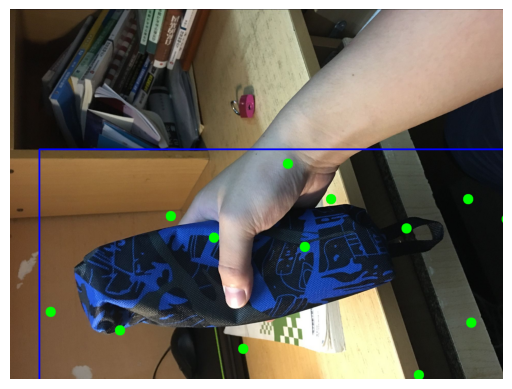

human_hand/Train/source/8774.jpg


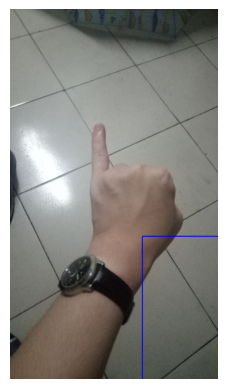

In [4]:
img_ids = anno.getImgIds()

visualize_sample(img_ids[0], point_radius=20, line_width=5)
visualize_sample(img_ids[1500], point_radius=10, line_width=5)
visualize_sample(img_ids[4001], point_radius=10, line_width=5)
visualize_sample(8000000000008470, point_radius=20, line_width=8)
visualize_sample(8000000000004250, point_radius=20, line_width=5)
visualize_sample(8000000000008774, point_radius=20, line_width=5)
